In [1]:
import pandas as pd

df=pd.read_csv('Popular_Baby_Names.csv')

In [2]:
#names of coumns
df.columns

Index(['Year of Birth', 'Gender', 'Ethnicity', 'Child's First Name', 'Count',
       'Rank'],
      dtype='object')

In [3]:
#types of columns
df.dtypes

Year of Birth          int64
Gender                object
Ethnicity             object
Child's First Name    object
Count                  int64
Rank                   int64
dtype: object

In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69214 entries, 0 to 69213
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year of Birth       69214 non-null  int64 
 1   Gender              69214 non-null  object
 2   Ethnicity           69214 non-null  object
 3   Child's First Name  69214 non-null  object
 4   Count               69214 non-null  int64 
 5   Rank                69214 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.2+ MB


In [5]:
#number of missing values per column
df.isnull().sum()

Year of Birth         0
Gender                0
Ethnicity             0
Child's First Name    0
Count                 0
Rank                  0
dtype: int64

## Assign New Columns to a DataFrame

In [6]:
df_new=df.assign(Count_plus_5=df['Count']+5)

df_new.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank,Count_plus_5
0,2011,FEMALE,HISPANIC,GERALDINE,13,75,18
1,2011,FEMALE,HISPANIC,GIA,21,67,26
2,2011,FEMALE,HISPANIC,GIANNA,49,42,54
3,2011,FEMALE,HISPANIC,GISELLE,38,51,43
4,2011,FEMALE,HISPANIC,GRACE,36,53,41


## Delete a Column

In [7]:
#best method
df_new=df_new.drop(columns=['Count_plus_5'])
df_new.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [8]:
df_new.columns

Index(['Year of Birth', 'Gender', 'Ethnicity', 'Child's First Name', 'Count',
       'Rank'],
      dtype='object')

In [9]:
#df_new=df_new.drop(columns=['Count_plus_5'])
#or
#df_new=df_new.drop('Count_plus_5',axis=1) #axis=1 indicates that the operation applies to columns.
#In Pandas:
#axis=0: Refers to rows.
#axis=1: Refers to columns.


## Select rows where age is greater than 30 and rank is less than 20

In [10]:
df_query=df.query('Count > 30 and Rank < 20') #we can put == or !=, "or"

df_query.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
6,2011,FEMALE,HISPANIC,HAILEY,126,8
22,2011,FEMALE,HISPANIC,ISABELLA,331,1
81,2011,FEMALE,HISPANIC,KIMBERLY,103,13
90,2011,FEMALE,HISPANIC,LEAH,123,9
109,2011,FEMALE,HISPANIC,MADISON,122,10


In [11]:
#same thing
#df.loc[df['Count']>30]

## Sort by age in ascending order

In [12]:
df_sorted = df.sort_values(by='Count') #for a descending order add a parameter: ascending=False
#if categorical values they will be sorted alphabetically

df_sorted.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
83,2011,FEMALE,HISPANIC,KYLEE,10,78
89,2011,FEMALE,HISPANIC,LEA,10,78
96,2011,FEMALE,HISPANIC,LEYLA,10,78
69067,2013,MALE,WHITE NON HISPANIC,Jace,10,100
69071,2013,MALE,HISPANIC,Adan,10,95


## DataFrame Sample

In [13]:
df['Ethnicity'].sample(n=3,random_state=1) #random state=1:Every time the code runs, the same 3 samples will be selected, ensuring consistent output

12008    WHITE NON HISPANIC
26446              HISPANIC
56360    WHITE NON HISPANIC
Name: Ethnicity, dtype: object

## Deleting all rows that have at least a 'NaaN' value

In [14]:
df=df.dropna() #used when we have a lot of data and few missing values in order to not affect the data quality

## Modifying values using map function

In [15]:
df_mapped=df.map(lambda x: str(x)) #will convert the values of each cell to string
df_mapped

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
...,...,...,...,...,...,...
69209,2012,MALE,BLACK NON HISP,CAYDEN,19,52
69210,2013,FEMALE,WHITE NON HISPANIC,Margaret,25,67
69211,2013,FEMALE,WHITE NON HISPANIC,Tamar,10,82
69212,2013,FEMALE,WHITE NON HISPANIC,Amanda,13,79


In [16]:
df_mapped.dtypes

Year of Birth         object
Gender                object
Ethnicity             object
Child's First Name    object
Count                 object
Rank                  object
dtype: object

## Pivot Table

In [17]:
table=pd.pivot_table(df,values='Count', index=['Year of Birth'],
                     columns=['Rank'], aggfunc="sum") #values: colonne on which we'll apply the agrregation function (in our case sum)
#aggfunc can be count (occurence), size, mean, min, max..
#YearofBirth is set as  the rows (index) of the pivot table.
#columns=['Rank']: Sets Rank as the columns of the pivot table
#end goal: the values in the Count column are summed up for each combination of YearofBirth (row) and Rank (column)
table.head()


Rank,1,2,3,4,5,6,7,8,9,10,...,93,94,95,96,97,98,99,100,101,102
Year of Birth,,,,,,,,,,,,,,,,,,,,,
2011,13077.0,12488.0,9892.0,9296.0,8568.0,7960.0,7791.0,7070.0,6846.0,7168.0,...,2408.0,2856.0,756.0,1694.0,1680.0,NaN,NaN,NaN,NaN,NaN
2012,12405.0,11920.0,9961.0,9750.0,8230.0,8717.0,7941.0,7913.0,7311.0,6937.0,...,2169.0,2524.0,1575.0,1260.0,1625.0,1344.0,924.0,1120.0,NaN,NaN
2013,11571.0,9600.0,10405.0,8785.0,8436.0,7956.0,7163.0,7061.0,6645.0,7372.0,...,2358.0,2128.0,2900.0,1358.0,1144.0,1344.0,1606.0,1400.0,NaN,NaN
2014,11034.0,12461.0,10131.0,8657.0,8340.0,8572.0,7598.0,6911.0,6977.0,8317.0,...,1257.0,2288.0,2010.0,2872.0,2679.0,2420.0,1599.0,2400.0,2002.0,1120.0
2015,2081.0,1618.0,1536.0,1394.0,1380.0,1342.0,1108.0,1124.0,958.0,986.0,...,359.0,280.0,140.0,221.0,180.0,88.0,240.0,NaN,NaN,NaN


In [18]:
table1=pd.pivot_table(df,values=['Count'], index=['Year of Birth'],
                     columns=['Ethnicity'], aggfunc="sum")
table1.head()

Count                                            \
Ethnicity     ASIAN AND PACI ASIAN AND PACIFIC ISLANDER BLACK NON HISP   
Year of Birth                                                            
2011                     NaN                    56406.0            NaN   
2012                 70985.0                        NaN        70050.0   
2013                     NaN                    62639.0            NaN   
2014                     NaN                    66038.0            NaN   
2015                     NaN                     9584.0            NaN   

                                                                              
Ethnicity     BLACK NON HISPANIC  HISPANIC WHITE NON HISP WHITE NON HISPANIC  
Year of Birth                                                                 
2011                     73668.0  170069.0            NaN           173458.0  
2012                         NaN  161423.0       183854.0                NaN  
2013                     68980.0  155786.0            NaN           183313.0  
2014                     67599.0  154094.0            NaN           185986.0  
2015                      9637.0   22813.0            NaN            27566.0

## Replacing values in the DataFrame: Replace function

In [19]:
df['Ethnicity'].value_counts().to_dict()

{'HISPANIC': 20365,
 'WHITE NON HISPANIC': 19642,
 'BLACK NON HISPANIC': 10052,
 'ASIAN AND PACIFIC ISLANDER': 9383,
 'WHITE NON HISP': 4843,
 'ASIAN AND PACI': 2483,
 'BLACK NON HISP': 2446}

In [20]:
df['Ethnicity']=df['Ethnicity'].replace('HISPANIC', 'LATINOS')

In [21]:
df['Ethnicity'].value_counts().to_dict()

{'LATINOS': 20365,
 'WHITE NON HISPANIC': 19642,
 'BLACK NON HISPANIC': 10052,
 'ASIAN AND PACIFIC ISLANDER': 9383,
 'WHITE NON HISP': 4843,
 'ASIAN AND PACI': 2483,
 'BLACK NON HISP': 2446}

## Create a new column from other columns

In [22]:
language_map={'LATINOS': 'Spanish',
 'WHITE NON HISPANIC': 'NA',
 'BLACK NON HISPANIC': 'French',
 'ASIAN AND PACIFIC ISLANDER': 'Mandarin',
 'WHITE NON HISP': 'English',
 'ASIAN AND PACI': 'Mandarin',
 'BLACK NON HISP': 'French'   
} #mapping a partier des clés

In [23]:
df['Second_Language']=df['Ethnicity'].map(language_map)
df['Second_Language'].value_counts()

Second_Language
Spanish     20365
NA          19642
French      12498
Mandarin    11866
English      4843
Name: count, dtype: int64

In [24]:
df=df.rename(columns={"Second_Language": "Common_Language"})

In [25]:
df.columns

Index(['Year of Birth', 'Gender', 'Ethnicity', 'Child's First Name', 'Count',
       'Rank', 'Common_Language'],
      dtype='object')

## Merging 2 DataFrames: Merge funtion

In [26]:
#2 DFs should have same number of columns
# Define a dictionary containing employee data 
data1 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Age':[27, 24, 22, 32],} 
# Define a dictionary containing employee data 
data2 = {'key': ['K0', 'K1', 'K2', 'K3'],
         'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj'], 
        'Qualification':['Btech', 'B.A', 'Bcom', 'B.hons']} 
# Convert the dictionary into DataFrame  
df1 = pd.DataFrame(data1)
# Convert the dictionary into DataFrame  
df2 = pd.DataFrame(data2) 
print(df1, "\n\n", df2)

  key    Name  Age
0  K0     Jai   27
1  K1  Princi   24
2  K2  Gaurav   22
3  K3    Anuj   32 

   key    Address Qualification
0  K0     Nagpur         Btech
1  K1     Kanpur           B.A
2  K2  Allahabad          Bcom
3  K3    Kannuaj        B.hons


In [27]:
res = pd.merge(df1, df2, on='key')   # SQL Join
res

,key,Name,Age,Address,Qualification
0,K0,Jai,27,Nagpur,Btech
1,K1,Princi,24,Kanpur,B.A
2,K2,Gaurav,22,Allahabad,Bcom
3,K3,Anuj,32,Kannuaj,B.hons


## Save the changes in csv document

In [28]:
df.to_csv("Updated_Popular_Baby_Names.csv",index=False)

## Correlation - Heatmap
### heatmaps of correlation matrices work only on numerical columns, because correlation calculations (e.g., Pearson, Spearman, or Kendall) require numeric data

<Axes: title={'center': 'Feature-correlation (pearson)'}>

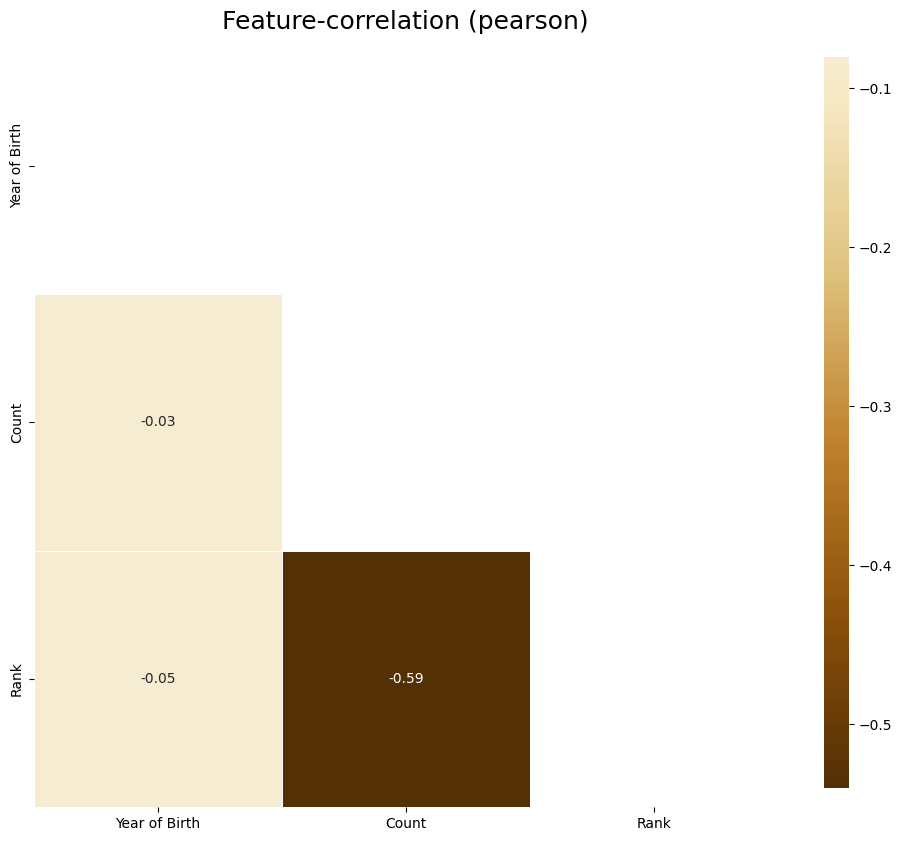

In [31]:
#1st method (easier)
import klib
klib.corr_plot(df) #categorical columns will be automatically ignored and only numercial ones will be considered.

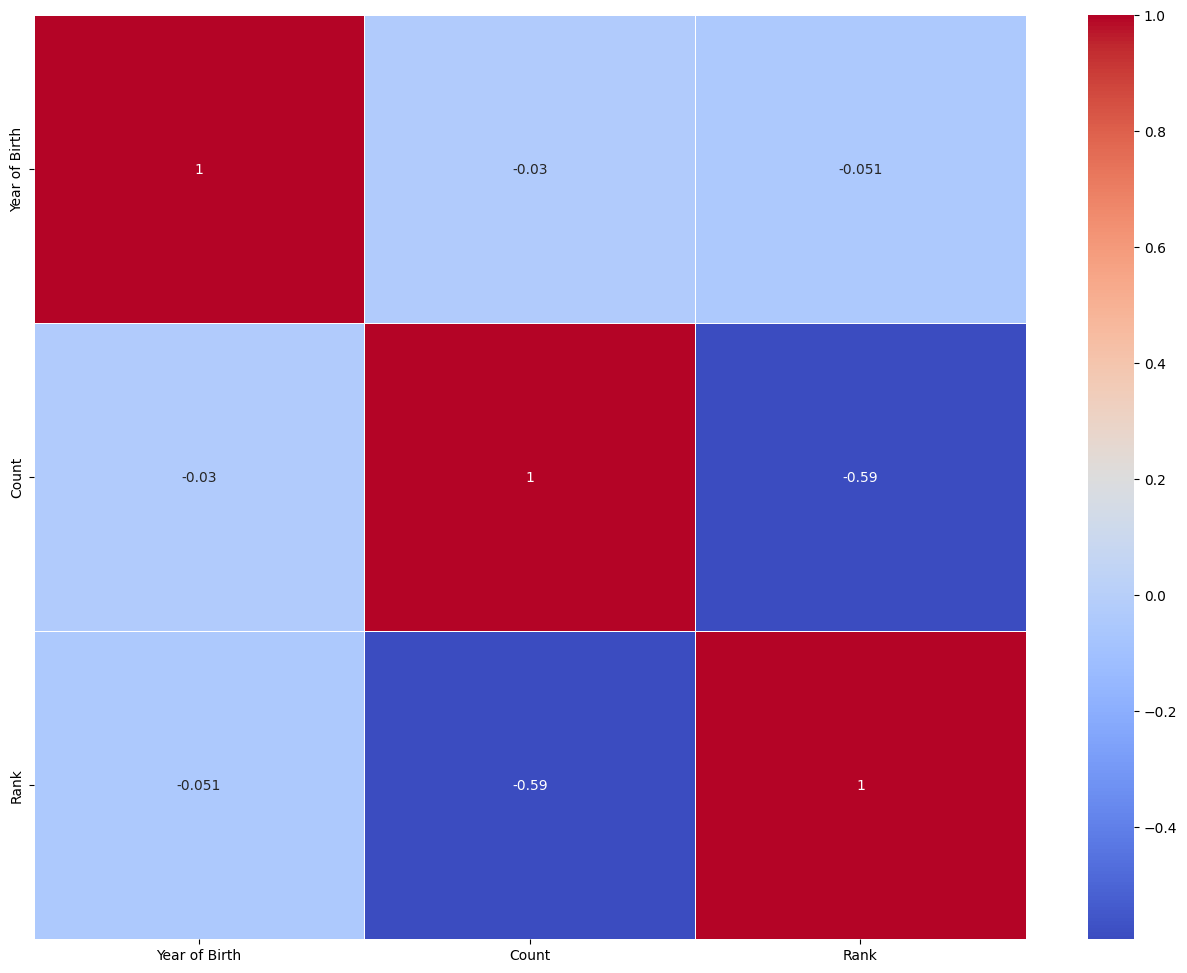

In [ ]:
#2nd method
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix=df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(16,12)) #initializing an empty figure by specifying its height and width
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5) #heatmap: matrice de correlation
plt.show() #print function of visualizations